<a href="https://colab.research.google.com/github/o-naim/Intro-to-AI/blob/main/DiabetesML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identificatio

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Code cell
url ="https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"
df=pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

The dataset comprises the following features:<br/>

gender: Categorical (Male/Female)<br/>
age: Continuous (in years)<br/>
hypertension: Binary (0: No, 1: Yes)<br/>
heart_disease: Binary (0: No, 1: Yes)<br/>
smoking_history: Categorical (Ever, Never, Former, Current, No Info,)<br/>
bmi: Continuous (Body Mass Index)<br/>
HbA1c_level: Continuous (percentage)<br/>
blood_glucose_level: Continuous (mg/dL)<br/>
diabetes: Target Variable (0: No Diabetes, 1: Diabetes)<br/>

In [ ]:
# Code cell

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

I decided to do a pairplot to have a quick overview of the model. Any corelations between classes and their 'impacts', or natural clusters.

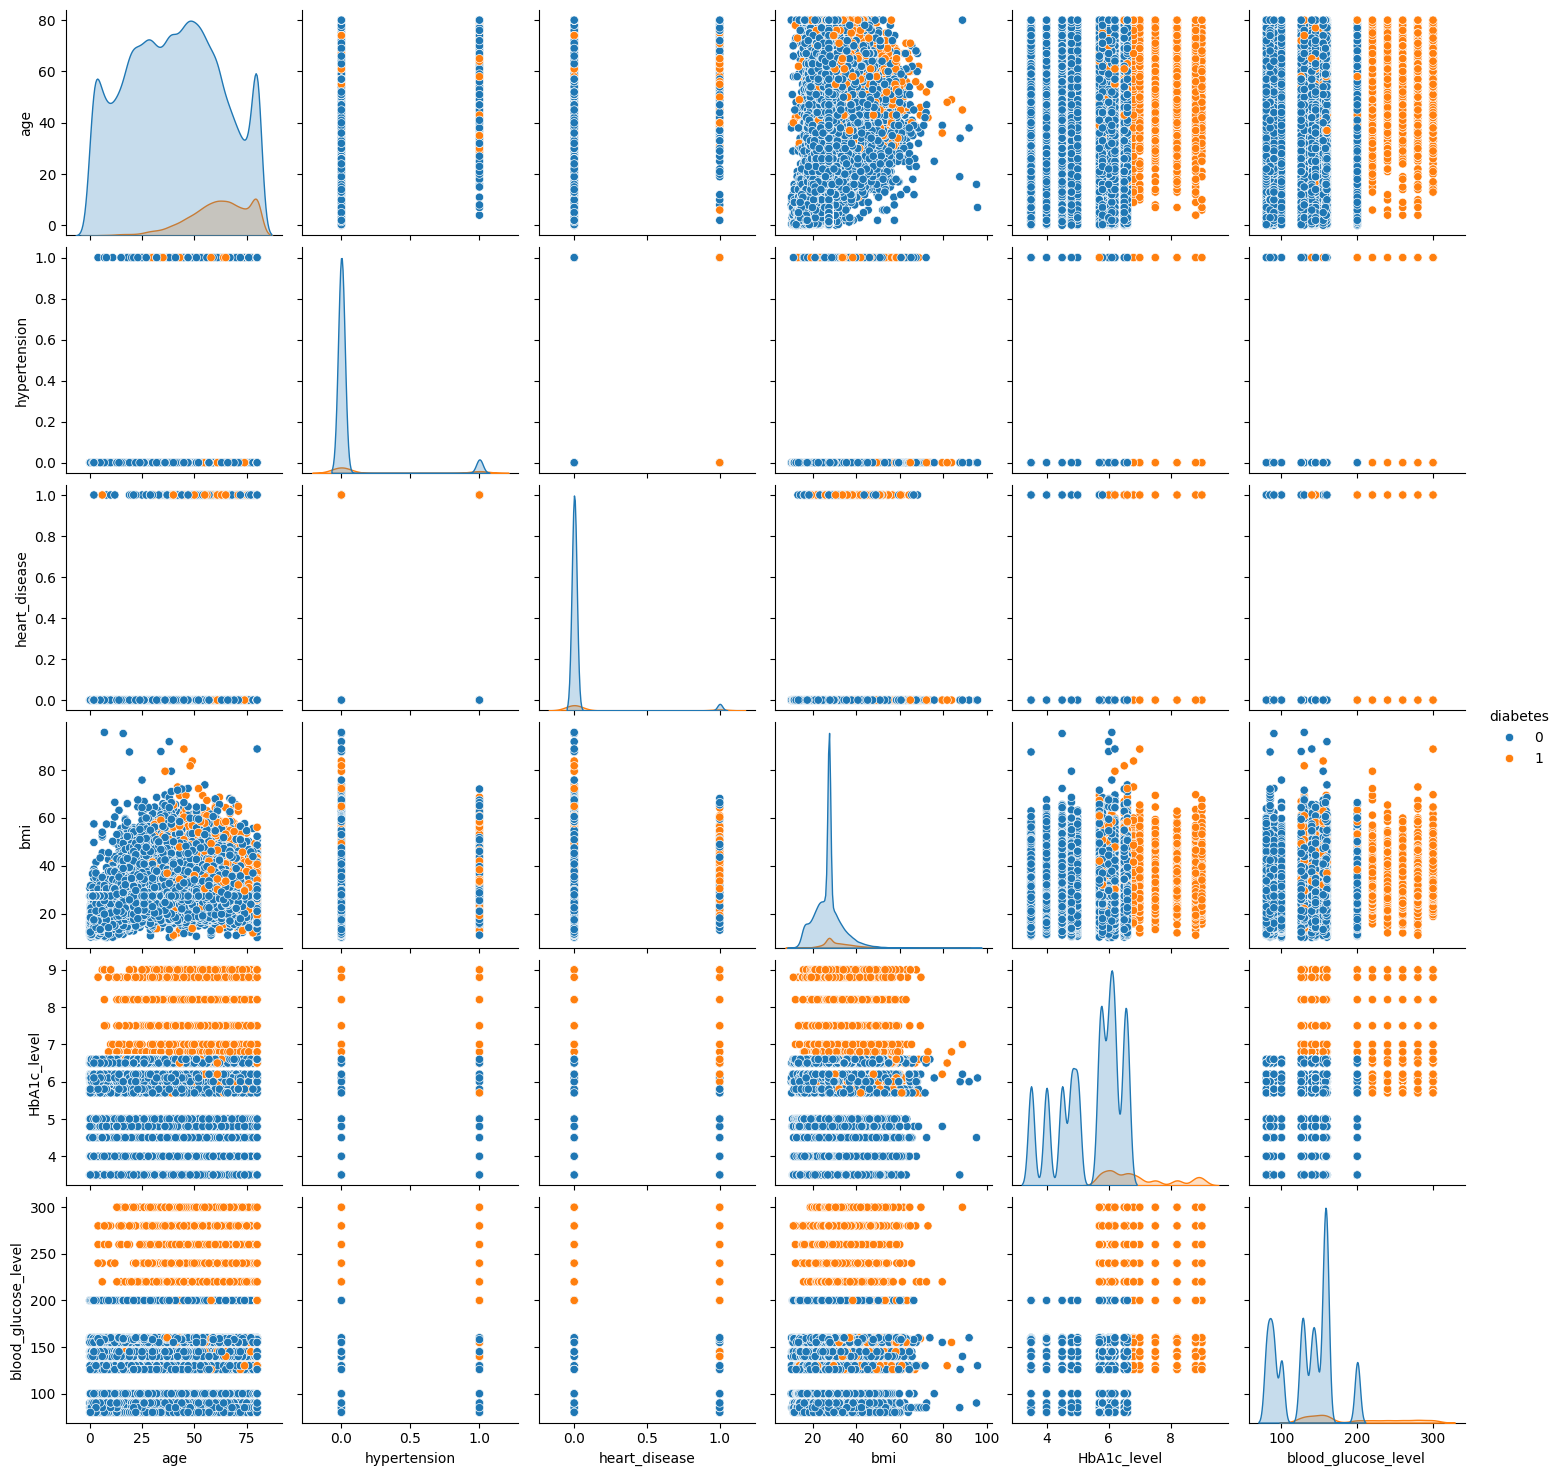

In [ ]:
# Code cellplt.figure()
sns.pairplot(df, hue="diabetes")
plt.show()

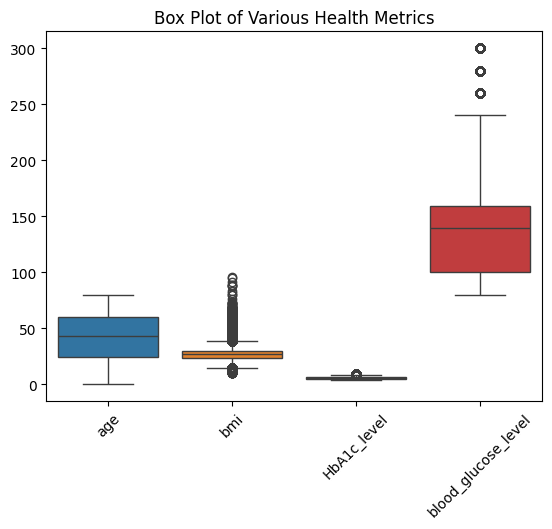

In [ ]:
data=df
sns.boxplot(data=data.drop(columns=['gender', 'smoking_history', 'diabetes','hypertension','heart_disease']))
plt.title("Box Plot of Various Health Metrics")
plt.xticks(rotation=45)
plt.show()

In the dataset analyzed, a significant class imbalance was observed regarding the relationship between various health conditions (specifically heart disease and hypertension) and diabetes status. The count plots generated for gender, hypertension, heart disease, and smoking history revealed the following key insights:<br/>
-The count plots showed a higher prevalence of the 0 classification in both heart disease and hypertension among individuals without diabetes. <br/>
-The distribution of the target variable indicated a pronounced imbalance, in the following classes smoking history, where never and former were preminant.

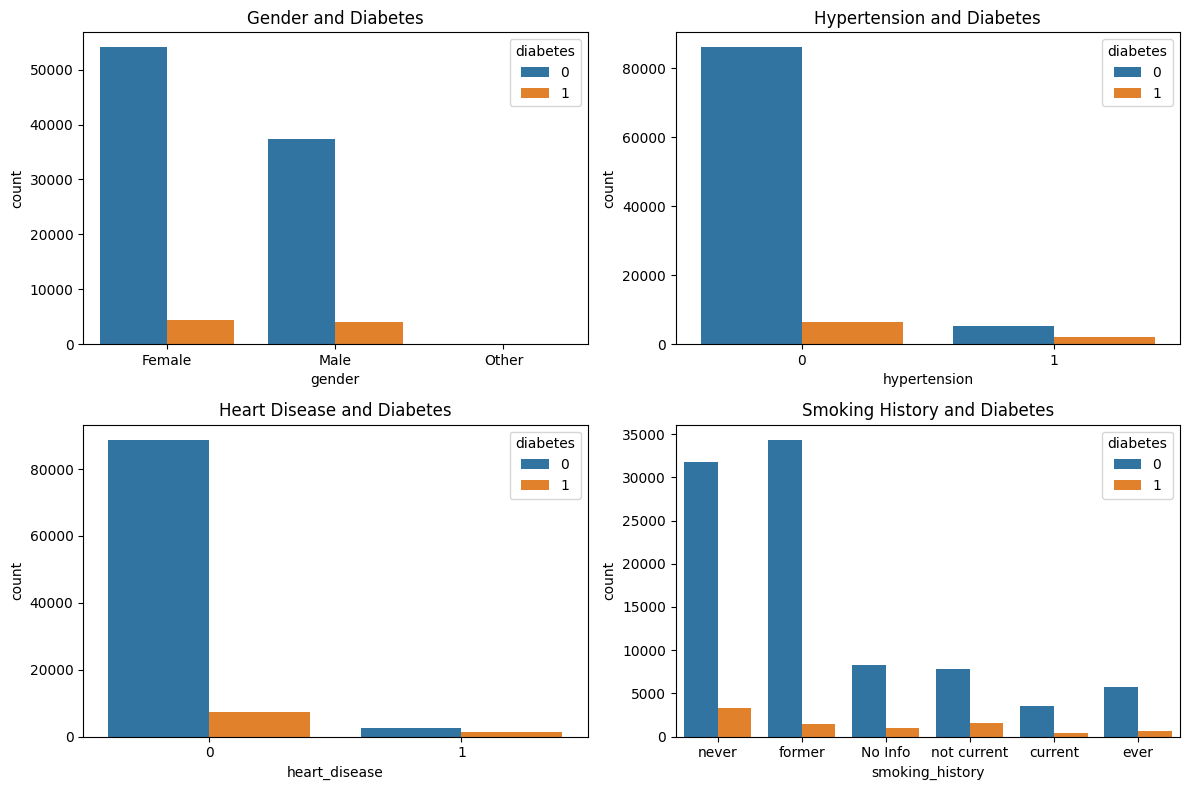

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Gender and Diabetes')


plt.subplot(2, 2, 2)
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension and Diabetes')


plt.subplot(2, 2, 3)
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart Disease and Diabetes')


plt.subplot(2, 2, 4)
sns.countplot(data=df, x='smoking_history', hue='diabetes')
plt.title('Smoking History and Diabetes')
plt.xticks(ticks=range(6), labels=['never', 'former', 'No Info', 'not current', 'current', 'ever'])


plt.tight_layout()
plt.show()

Since there are no age-related outliers, it indicates that the age data doesn't have extreme or unusual values, which may simplify modeling.<br/>

There are individuals with both extremely low and extremely high BMI values(underweight and obese), indicating outliers on both ends. <br/>

HbA1c levels, which reflect long-term blood sugar levels, show outliers in the upper range. This is expected since individuals with uncontrolled diabetes will have significantly higher HbA1c levels.These outliers could be highly informative for the prediction model, as they directly relate to diabetes diagnosis. <br/>

Blood glucose levels also have outliers on the higher end, which is common in individuals with diabetes or those at risk.



3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

In [ ]:
class_counts = df['diabetes'].value_counts()
print("Class Counts:\n", class_counts)

Class Counts:
 diabetes
0    91500
1     8500
Name: count, dtype: int64


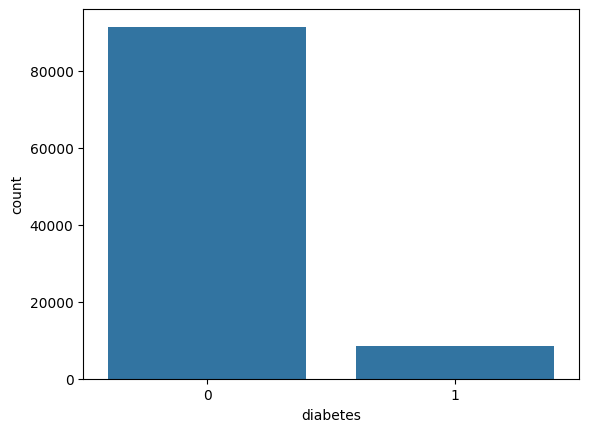

In [ ]:
sns.countplot(x="diabetes",data=df)
plt.show()

This shows a clear class imbalance, with the non-diabetic class outnumbering the diabetic class by a ratio of approximately 10:1. This means that for every 10 non-diabetic samples, there's only about 1 diabetic sample.

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [ ]:
# Code cell
features=['gender', 'age', 'heart_disease', 'bmi','HbA1c_level','blood_glucose_level','smoking_history','hypertension']
# gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
target=['diabetes']
x= df[features]
y=df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

    **Justification**: Efficiently converts categorical variables into numeric whilst not increasing dimensionality, keeps the preprocessing simple.

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in x_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train[column] = le.fit_transform(x_train[column])
    x_test[column] = le.transform(x_test[column])


6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    Technique Used: StandardScaler is used to normalize/standardize numerical features by having them scaled with a mean of 0 and a standard deviation of 1, ensuring equal contribution of said numerical features.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_x_train = scaler.fit_transform(x_train)
scale_x_test = scaler.transform(x_test)


## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
regression = LogisticRegression(max_iter=1000)

tree.fit(scale_x_train, y_train)
knn.fit(scale_x_train, y_train)
regression.fit(scale_x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    Justification: 5-fold cross-validation was used in order to train and validate with lower computation time. The F1-score balances precision & recall, and thus is used as an ideal class imbalance handler.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

{'Decision Tree F1 Score': np.mean(cross_val_score(tree, scale_x_train, y_train, cv = 5, scoring = 'f1')),
'K-Nearest Neighbour F1 Score': np.mean(cross_val_score(knn, scale_x_train, y_train, cv = 5, scoring = 'f1')),
'Logistic Regression F1 Score': np.mean(cross_val_score(regression, scale_x_train, y_train, cv = 5, scoring = 'f1'))}

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

{'Decision Tree F1 Score': 0.7181370423294025,
 'K-Nearest Neighbour F1 Score': 0.73222979402355,
 'Logistic Regression F1 Score': 0.7313374742355577}

Investigate the impact of varying hyperparameter values on the performance of each model.<br/>
• Focus on the following relevant hyperparameters for each model:<br/>
– DecisionTreeClassifier: criterion and max_depth.<br/>
– LogisticRegression: penalty, max_iter, and tol.<br/>
– KNeighborsClassifier: n_neighbors and weights<br/>
Employ a grid search strategy or utilize scikit-learn’s built-in methods to thoroughly
evaluate all combinations of hyperparameter values. Cross-validation should be used
to assess each combination.<br/>
• Quantify the performance of each hyperparameter configuration using precision,
recall, and F1-score as metrics.<br/>
• Display the results in a tabular or graphical format (e.g., line charts, bar charts) to
effectively demonstrate the influence of hyperparameter variations on model performance.<br/>
• Specify the default values for each hyperparameter tested.<br/>
• Analyze the findings and offer insights into which hyperparameter configurations
achieved optimal performance for each model.
<br/>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e

param_gridDT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 5, 10, 15, 20, 30, 50]
}

grid_searchDT = GridSearchCV(estimator= tree, param_grid=param_gridDT, cv=5, scoring='accuracy')
grid_searchDT.fit(scale_x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 5, 10, 15, 20, 30, 50]},
             scoring='accuracy')

In [ ]:
param_gridLR = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300],
    'tol': [1e-3, 1e-4, 1e-5]
}

grid_searchLR = GridSearchCV(estimator=regression , param_grid=param_gridLR, cv=5, scoring='accuracy')
grid_searchLR.fit(scale_x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy')

In [ ]:
param_gridKNN = {
    'n_neighbors': [3, 5, 7, 9,15,50 ,100 ],
    'weights': ['uniform', 'distance']
}

grid_searchKNN = GridSearchCV(estimator=knn , param_grid=param_gridKNN, cv=5, scoring='accuracy')
grid_searchKNN.fit(scale_x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 15, 50, 100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Performance quantification on test set
from sklearn.metrics import classification_report,accuracy_score


y_pred_dt = grid_searchDT.best_estimator_.predict(scale_x_test)
print("Decision Tree Classification Report:\n"+classification_report(y_test, y_pred_dt))


y_pred_lr = grid_searchLR.best_estimator_.predict(scale_x_test)
print("Logistic Regression Classification Report:\n"+ classification_report(y_test, y_pred_lr))


y_pred_knn = grid_searchKNN.best_estimator_.predict(scale_x_test)
print("KNN Classification Report:\n"+classification_report(y_test, y_pred_knn))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.93      0.59      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.

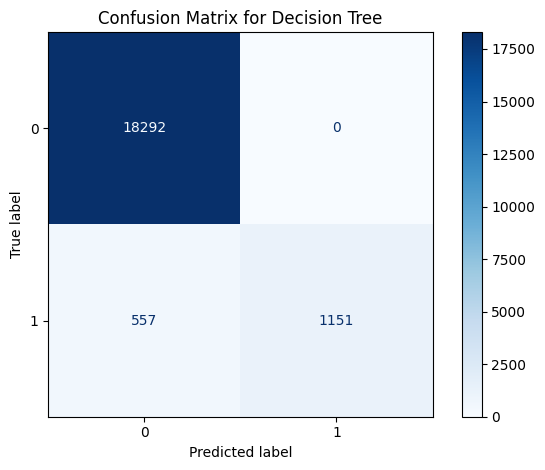

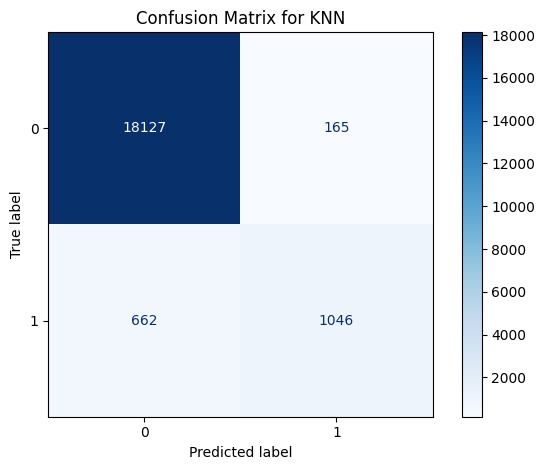

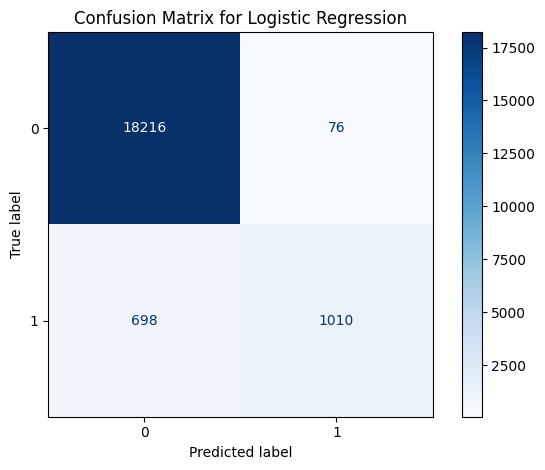

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = [y_pred_dt, y_pred_lr, y_pred_knn]
model_names = ['Decision Tree', 'KNN', 'Logistic Regression']

for pred, model_name in zip(predictions, model_names):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for ' +model_name)
    plt.tight_layout()
    plt.show()

In [ ]:
#hyper parameters results  into which hyperparameter configurations achieved optimal performance for each model.
results_summary = {
    "Decision Tree best parameter": grid_searchDT.best_params_,
    "Decision Tree best score": grid_searchDT.best_score_,

    "KNN best parameter": grid_searchKNN.best_params_,
    "KNN best score": grid_searchKNN.best_score_,

    "Logistic Regression best parameter": grid_searchLR.best_params_,
    "Logistic Regression best score": grid_searchLR.best_score_,
}

for key, value in results_summary.items():
    print(f"{key}: {value}")

Decision Tree best parameter: {'criterion': 'gini', 'max_depth': 5}
Decision Tree best score: 0.9718
KNN best parameter: {'n_neighbors': 9, 'weights': 'uniform'}
KNN best score: 0.9623375000000001
Logistic Regression best parameter: {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}
Logistic Regression best score: 0.960675


## Default parameters<br/>

***DecisionTreeClassifier***:<br/>

criterion: "gini" <br/>
max_depth: None <br/>
<br/>
***LogisticRegression***:

penalty: "l2" (L2 regularization)<br/>
max_iter: 100<br/>
tol: 1e-5<br/>
<br/>
***KNeighborsClassifier***:<br/>

n_neighbors: 5<br/>
weights: "uniform"<br/>

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.


The Decision Tree effectively handles the majority class but struggles with the minority class due to the imbalanced dataset. (Precision and recall)<br/>



*   The tuned Decision Tree uses max_depth=5, which limits its complexity and likely helps reduce overfitting.
<br/>
**Knn**:It handles pretty well the majority class, but the recall and precision for 1 is even lower, which fails to identify the minority diabetes class


*   The choice of n_neighbors=9 for the KNN model indicates a balance between considering a sufficient number of neighbors to capture local patterns and avoiding overfitting. However, as a non-parametric model, KNN's performance is sensitive to the underlying data distribution.
<br/>










<br/>

**Regression** :It effectively handles the majority class but struggles with the minority class due to the imbalanced dataset. (Precision and recall)


*   The regression is the simplest model of the 3

<br/>

They all have smilar best scores 96% to 97%.
The grat imabalance with 10:1 ratio, limit to have a great generalization and recognition of patterns within the model, it is very biased
<br/>
_Decision Tree is flexible, complex, suitable for non-linear relationships, but susceptible to class imbalance.<br/>
_Logistic Regression id simpler, less flexible for non-linear relationships, also susceptible to class imbalance.<br/>
_KNN is non-parametric, performs similarly to Logistic Regression, suggesting that complexity or non-linearity alone may not overcome class imbalance challenges.







In [ ]:
DTmodel = DecisionTreeClassifier(criterion='gini', max_depth=5)
DTmodel.fit(scale_x_train, y_train)
dt_predictions = DTmodel.predict(scale_x_test)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn_model.fit(scale_x_train, y_train)
knn_predictions = knn_model.predict(scale_x_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     73208
           1       0.96      0.64      0.76      6792

    accuracy                           0.97     80000
   macro avg       0.96      0.82      0.87     80000
weighted avg       0.97      0.97      0.96     80000



In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

y_train_array = np.ravel(y_train)

regressionModel = LogisticRegression(penalty='l2', max_iter=100, tol=1e-5)

regressionModel.fit(scale_x_train, y_train_array)

reg_predictions = regressionModel.predict(scale_x_train)




              precision    recall  f1-score   support

           0       0.97      0.99      0.98     73208
           1       0.87      0.63      0.73      6792

    accuracy                           0.96     80000
   macro avg       0.92      0.81      0.86     80000
weighted avg       0.96      0.96      0.96     80000



In [ ]:
print("DT "+classification_report(y_test, dt_predictions))
print("knn"+classification_report(y_train, knn_predictions))
print("Reg"+classification_report(y_train_array, reg_predictions))

DT               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

knn              precision    recall  f1-score   support

           0       0.97      1.00      0.98     73208
           1       0.96      0.64      0.76      6792

    accuracy                           0.97     80000
   macro avg       0.96      0.82      0.87     80000
weighted avg       0.97      0.97      0.96     80000

Reg              precision    recall  f1-score   support

           0       0.97      0.99      0.98     73208
           1       0.87      0.63      0.73      6792

    accuracy                           0.96     80000
   macro avg       0.92      0.81      0.86     80000
weighted avg       0.96      0.96      0.96     80000



Before the opt:<br/>
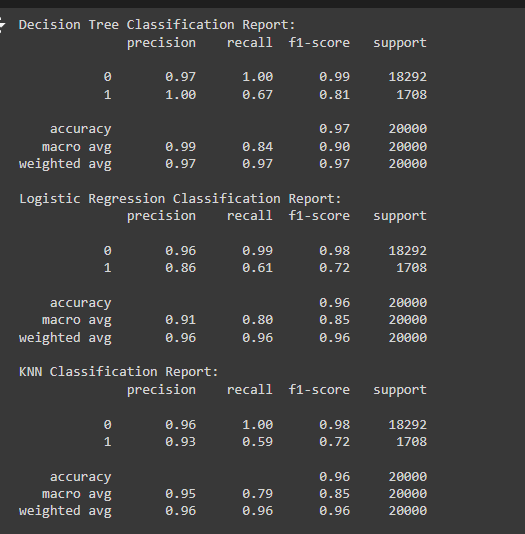

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

{'Decision Tree F1 Score': np.mean(cross_val_score(DTmodel, scale_x_train, y_train, cv = 5, scoring = 'f1')),
'K-Nearest Neighbour F1 Score': np.mean(cross_val_score(knn_model, scale_x_train, y_train, cv = 5, scoring = 'f1')),
'Logistic Regression F1 Score': np.mean(cross_val_score(regressionModel, scale_x_train, y_train, cv = 5, scoring = 'f1'))}

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

{'Decision Tree F1 Score': 0.8008297759614363,
 'K-Nearest Neighbour F1 Score': 0.7304421357488555,
 'Logistic Regression F1 Score': 0.7313377825646507}

***Conclusion*** after aplying the optimal parameter values identified from
the parameter optimization step. <br/>
 **Decision Tree (DT):**
Optimization did not significantly impact the performance of the Decision Tree. While precision for class 1 remains high, recall remains unchanged at 0.67.

 **Logistic Regression:**
 After optimization, logistic regression shows a slight improvement in class 1 recall (from 0.61 to 0.63) and precision (from 0.86 to 0.87). However, the F1-score for class 1 only marginally improves from 0.72 to 0.73.

 **K-Nearest Neighbors (KNN):**
   KNN shows the most notable improvement after optimization. Precision for class 1 increases from 0.93 to 0.96, and recall improves from 0.59 to 0.64, resulting in a higher F1 score for class 1 (from 0.72 to 0.76).




KNN is the recommended model due to its superior performance in classifying the minority class. It achieved significant improvements in precision and recall for class 1, while maintaining high overall accuracy, demonstrating its ability to handle imbalanced datasets effectively.


## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes?
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources

**Distrubution of tasks:**<br/>
 By dividing the work strategically, we were able to focus on different aspects of the machine-learning pipeline while still collaborating effectively.


*    :Responsible for Data Preprocessing and Model Development
**
*     :Responsible for Data Exploration and Hyperparameter Optimization.
* * The data exploration was based  on the application of assignement 1 acquired knowledge.
*  * gained insight on tuning model hyperparameters through grid search and evaluating their impact on model performance.










Resources:<br/>
**Olena Naim ChatGpt exchange: **https://chatgpt.com/share/671532d1-04d8-800e-9ec5-50d0a3046600